In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
all_dir = os.listdir()
csv_files = [file for file in all_dir if file.endswith(".csv")]
csv_files

['202208.csv',
 '202209.csv',
 '202210.csv',
 '202304.csv',
 '202305.csv',
 '202307.csv',
 '202308 Top 20 most searched queries in EMEA USA AUS.csv',
 '202306.csv',
 '202302.csv',
 '202303.csv',
 '202301.csv']

In [16]:
df_g = pd.DataFrame()
for file in csv_files:
    df = pd.read_csv(file,encoding='euc-kr')
    df_g = pd.concat([df_g,df])
df_g.head()

,id,kw_location,time_location,created_date,period,1,2,3,4,5,...,13,14,15,16,17,18,19,20,year,month
0,2611,US,UK,2022.8.1 8:05,Morning,Nichelle Nichols,UFC,Lil Uzi Vert,England vs Germany,Bill Russell death,...,Liverpool vs Strasbourg!,Kenan Thompson SNL,MLB trade deadline,Mandy Moore,McKinney Fire map,Hungarian Grand Prix,UFC 277,Powerball,2022,8
1,2612,UK,UK,2022.8.1 8:05,Morning,Love Island vote,Alex Yee,Celtic,Matt Walls crash,Beth Mead,...,Fara Williams,Becky Hill,Fran Kirby,UFC 277,Real Madrid vs Juventus,Ny Red Bulls vs Barcelona,Bill Russell,Archie Battersbee,2022,8
2,2614,DE,UK,2022.8.1 8:05,Morning,Ivana Trump,Fussball EM,Kosovo,Hertha BSC,Nichelle Nichols,...,Oberachern,PSG,Frauenfuball,Tina Ruland,Dieter Wedel,Waldhof Mannheim,Joe Biden,Deutschland Fuball,2022,8
3,2615,FR,UK,2022.8.1 8:05,Morning,1er aout,Mano,Jeanfi Janssens,Prince William,Nichelle Nichols,...,Manchester United \u2013 Rayo,Ptanque,Florent Pagny,Kosovo,Bill Russell,Ligue 1,Christophe Izard,Taiwan,2022,8
4,2616,NL,UK,2022.8.1 8:05,Morning,Nichelle Nichols,Ihattaren,F1 Hongarije,Wiegman,Almere Ajax,...,Aziatische hoornaar,Vitesse,Ajax,Annemiek van Vleuten,Maxime Meiland,Wibi Soerjadi,Ajax PSV,Formule 1 Hongarije,2022,8


In [23]:
df_g['created_date'] = pd.to_datetime(df_g['created_date'])

In [24]:
df_g.isnull().sum()

id               0
kw_location      0
time_location    0
created_date     0
period           0
1                0
2                0
3                0
4                0
5                0
6                0
7                0
8                0
9                0
10               0
11               0
12               0
13               0
14               0
15               0
16               0
17               0
18               0
19               0
20               0
year             0
month            0
dtype: int64

In [27]:
len(df_g)

4060

In [20]:
#time_location의 열은 하나 'uk'로 이루어짐
df_g.time_location.unique()

array(['UK'], dtype=object)

In [28]:
df_g.nunique()

id               4060
kw_location         7
time_location       1
created_date      580
period              2
1                2686
2                2994
3                3115
4                3149
5                3179
6                3214
7                3183
8                3260
9                3272
10               3249
11               3187
12               3252
13               3184
14               3212
15               3206
16               3203
17               3167
18               3179
19               3171
20               3158
year                2
month              10
dtype: int64

In [30]:
df['kw_location'].value_counts()

US     62
UK     62
DE     62
FR     62
NL     62
IT     62
AUS    62
Name: kw_location, dtype: int64

## 22, 23년도에 검색을 많이 한 나라는 어디일까

In [32]:
df_g[df_g.year == 2022]['kw_location'].value_counts()

US     148
UK     148
DE     148
FR     148
NL     148
IT     148
AUS    148
Name: kw_location, dtype: int64

In [33]:
df_g[df_g.year == 2023]['kw_location'].value_counts()

US     432
UK     432
DE     432
FR     432
NL     432
IT     432
AUS    432
Name: kw_location, dtype: int64

-> 모두 나라에 대해서 골고루 표본을 구한 것으로 보임

### 2022 vs 2023년도의 1, 2, 3 위 트렌드는 어떤식으로 변했을까

In [57]:
df22 = df_g[df_g.year == 2022]
df23 = df_g[df_g.year == 2023]
df_22_1 = df22['1'].value_counts().head(10)
df_22_2 = df22['2'].value_counts().head(10)
df_22_3 = df22['3'].value_counts().head(10)

df_23_1 = df23['1'].value_counts().head(10)
df_23_2 = df23['2'].value_counts().head(10)
df_23_3 = df23['3'].value_counts().head(10)

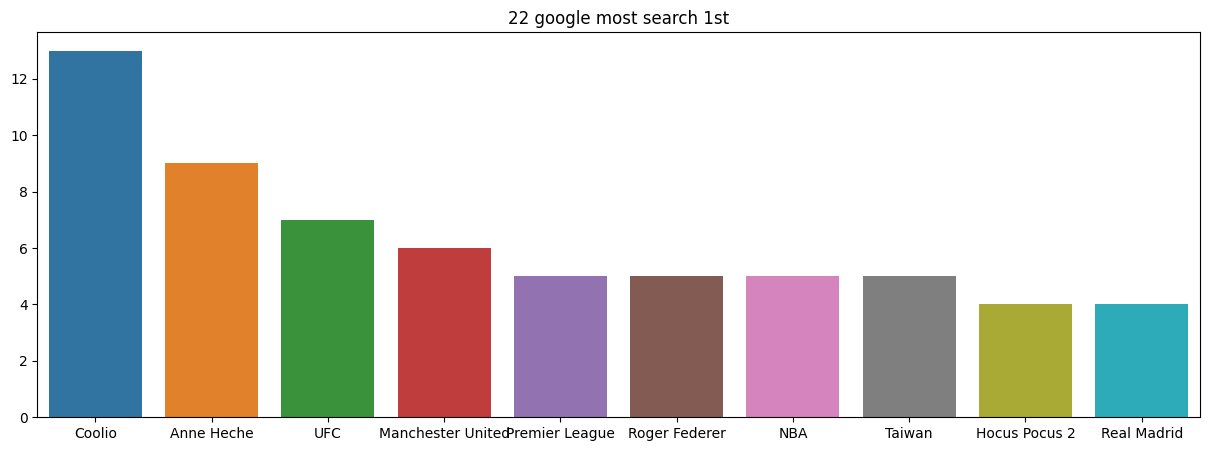

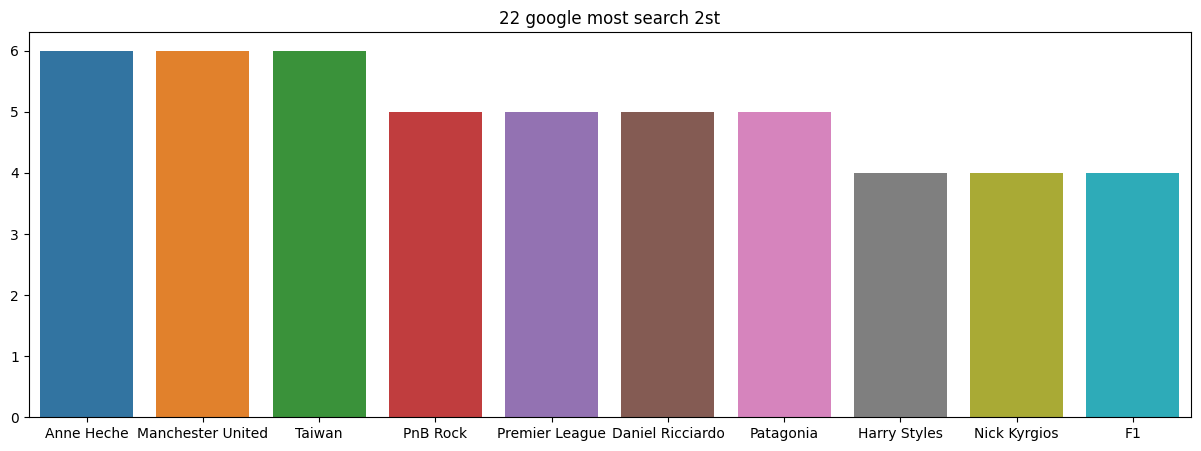

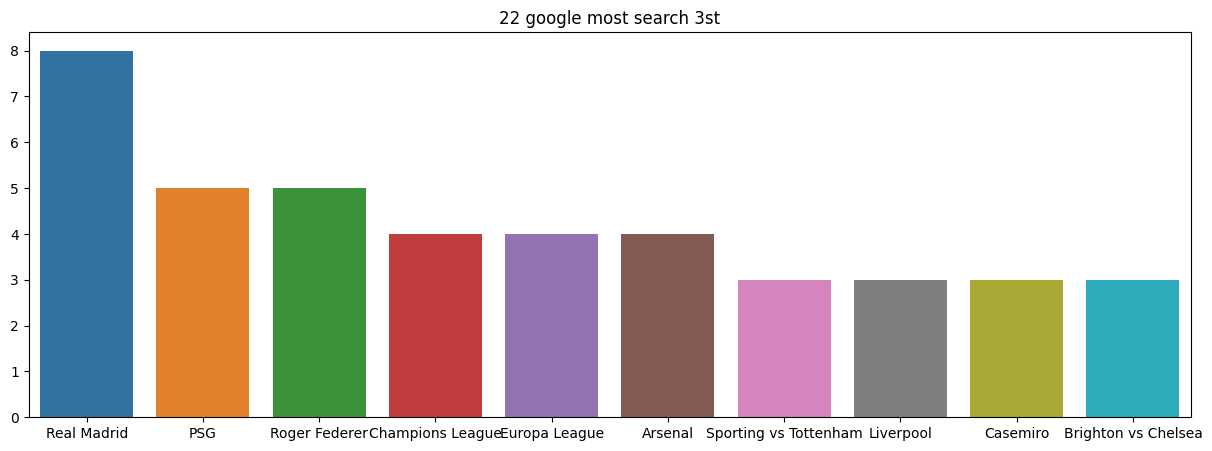

In [64]:
plt.figure(figsize=(15,5))
plt.title('22 google most search 1st')
sns.barplot(x=df_22_1.index,y=df_22_1.values)
plt.figure(figsize=(15,5))
sns.barplot(x=df_22_2.index,y=df_22_2.values)
plt.title('22 google most search 2st')
plt.figure(figsize=(15,5))
sns.barplot(x=df_22_3.index,y=df_22_3.values)
plt.title('22 google most search 3st')

plt.show()

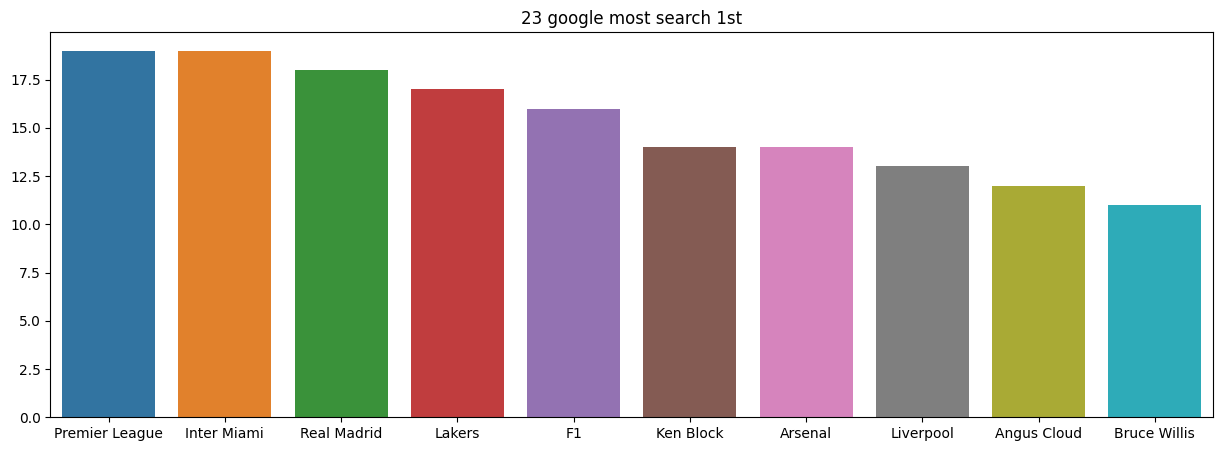

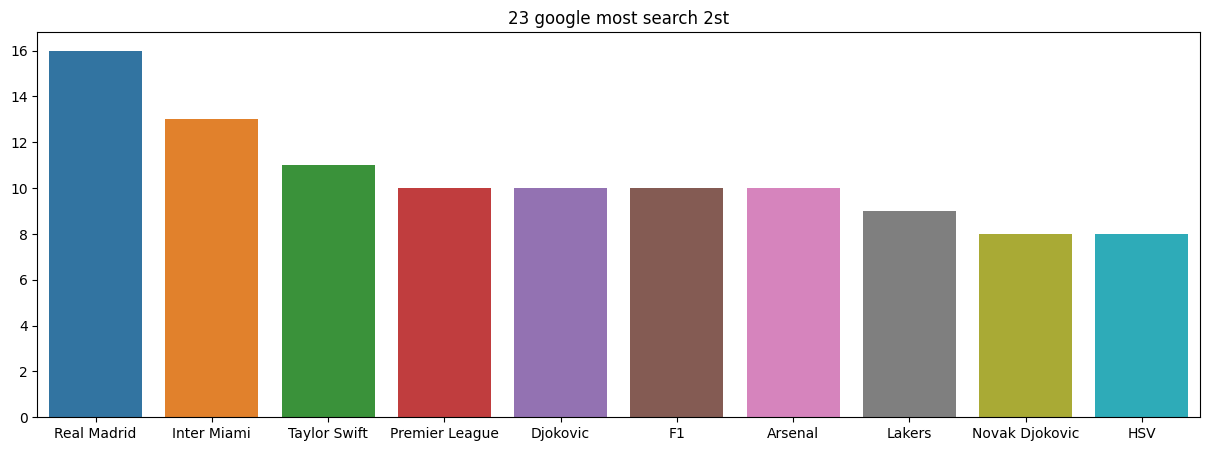

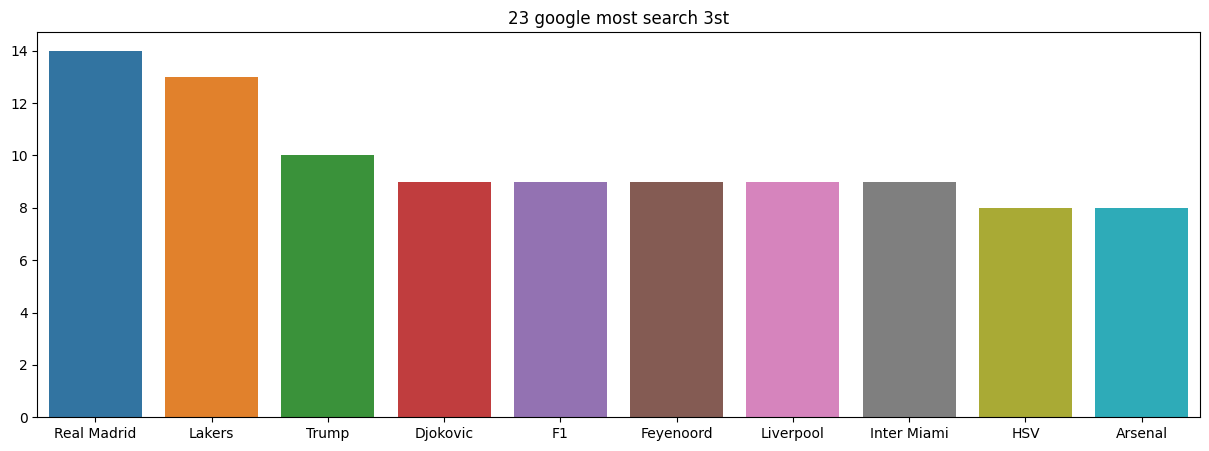

In [65]:
plt.figure(figsize=(15,5))
plt.title('23 google most search 1st')
sns.barplot(x=df_23_1.index,y=df_23_1.values)
plt.figure(figsize=(15,5))
sns.barplot(x=df_23_2.index,y=df_23_2.values)
plt.title('23 google most search 2st')
plt.figure(figsize=(15,5))
sns.barplot(x=df_23_3.index,y=df_23_3.values)
plt.title('23 google most search 3st')

plt.show()

22년도에 비해 23년도 레알 마드리드에 대한 관심이 증가한 것으로 나타남, 축구에 대한 키워드도 증가함

In [66]:
df_g['1'].value_counts().head(10)

Premier League       24
Real Madrid          22
F1                   19
Inter Miami          19
Lakers               19
UFC                  18
Arsenal              16
Manchester United    15
Liverpool            14
Ken Block            14
Name: 1, dtype: int64